In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ind_df = pd.read_excel('D:/Data/index/881001.WI.xlsx')

In [2]:
df = pd.read_excel('D:/market cap.xlsx')

In [4]:
df = df.transpose()

In [33]:
df.head()

,000001.SZ,000002.SZ,000004.SZ,000005.SZ,000006.SZ,000007.SZ,000008.SZ,000009.SZ,000010.SZ,000011.SZ,...,603987.SH,603988.SH,603989.SH,603990.SH,603991.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
2000-01-28,2.870917e+10,5.755420e+09,1.125288e+09,4.273644e+09,2.786972e+09,1.325370e+09,6.702442e+09,3.940709e+09,1.042354e+09,3.424171e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-02-29,2.842984e+10,9.357314e+09,1.137884e+09,4.444590e+09,2.923912e+09,1.537888e+09,6.220750e+09,4.199588e+09,1.254059e+09,3.917208e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-03-31,2.850743e+10,8.007034e+09,1.346986e+09,4.651797e+09,2.840226e+09,1.873897e+09,5.331756e+09,5.446041e+09,1.454003e+09,4.572785e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-04-28,2.957821e+10,7.874530e+09,1.289042e+09,4.729500e+09,3.045635e+09,1.622608e+09,5.266204e+09,5.714508e+09,1.368732e+09,4.529441e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-05-31,2.793325e+10,7.502256e+09,1.760991e+09,5.180175e+09,3.010133e+09,1.579530e+09,4.867741e+09,6.481556e+09,1.324627e+09,3.900954e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
n = 200
mask = df.rank(axis=1, ascending=False)
mask[mask <= n] = 1
mask[mask > n] = 0
cap = (mask * df).sum(axis=1)

In [6]:
tot = df.sum(axis=1)

In [7]:
ratio = cap / tot

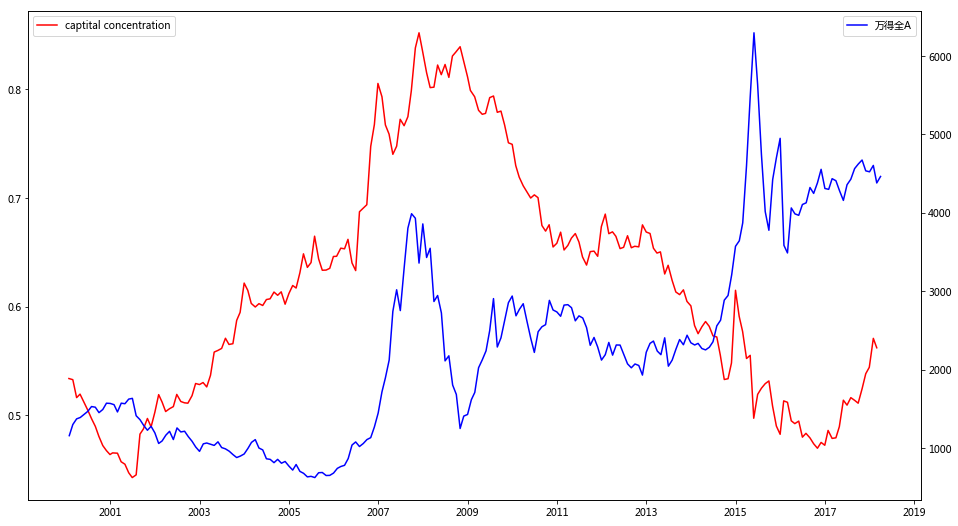

In [12]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df['close'].resample('M').last(), label=u'万得全A', color='blue')
ax2.legend()

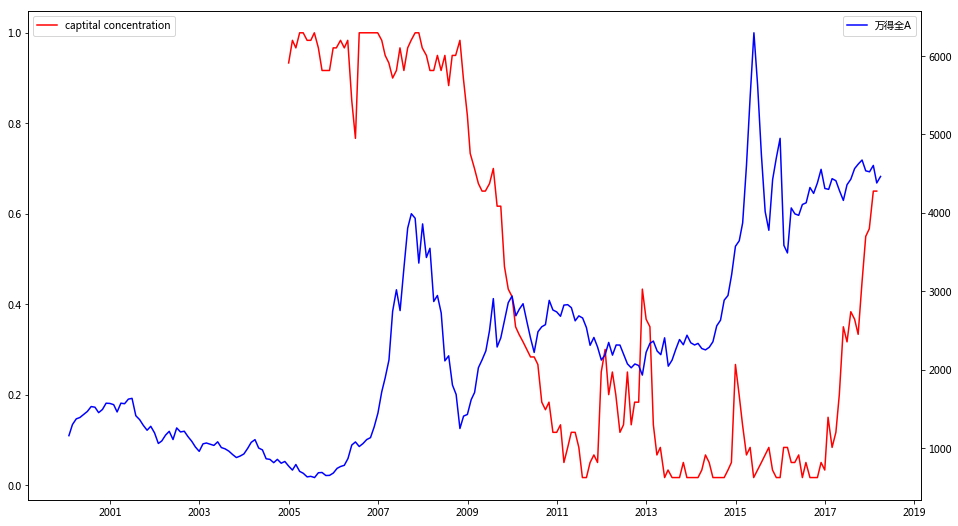

In [26]:
rank_ratio = ratio.rolling(60).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(rank_ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df['close'].resample('M').last(), label=u'万得全A', color='blue')
ax2.legend()

In [29]:
mratio = pd.Series(index=df.index)
for date in df.index:
    s = df.loc[date]
    s = s.replace([0.0], np.NAN).dropna()
    n = s.shape[0] / 10
    cap = s.sort_values(ascending=False)[:n].sum()
    mratio.loc[date] = cap / s.sum()

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


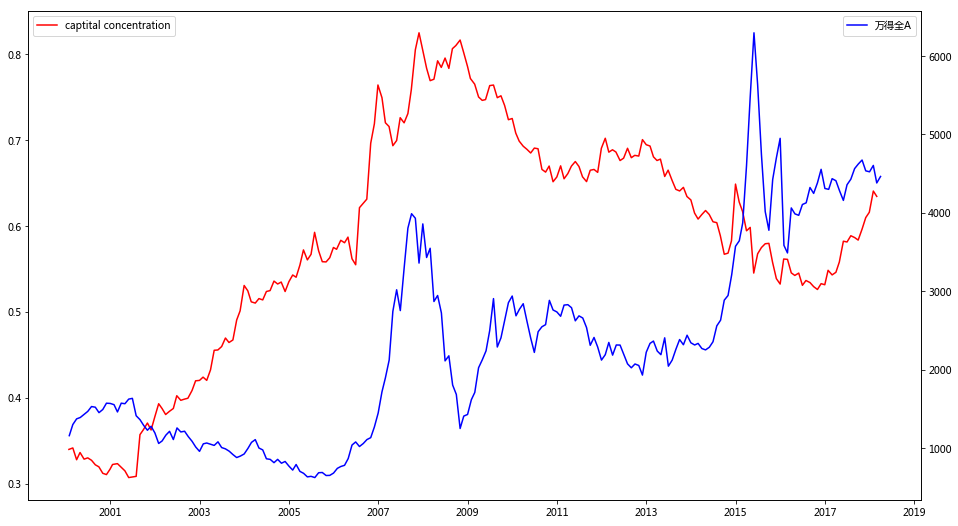

In [31]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(mratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df['close'].resample('M').last(), label=u'万得全A', color='blue')
ax2.legend()

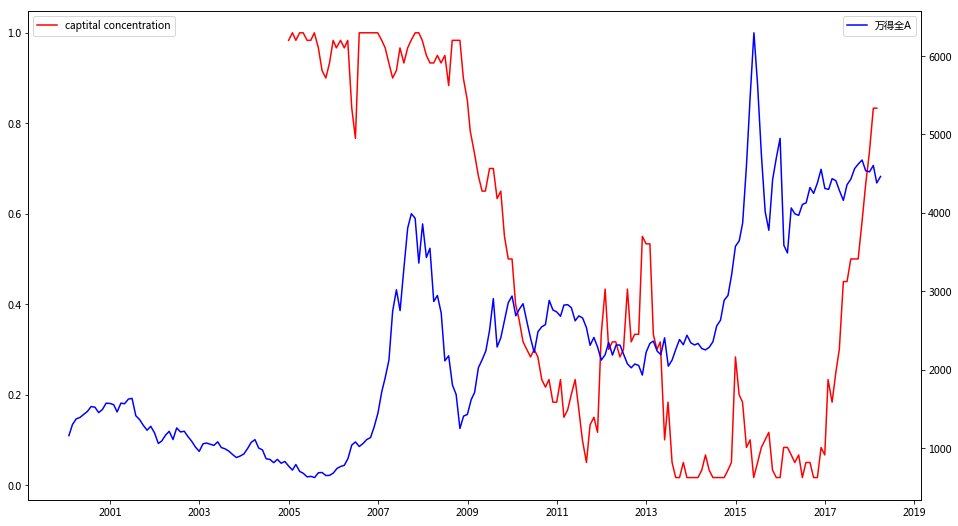

In [32]:
rank_ratio = mratio.rolling(60).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(rank_ratio, color='red', label='captital concentration')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(ind_df['close'].resample('M').last(), label=u'万得全A', color='blue')
ax2.legend()